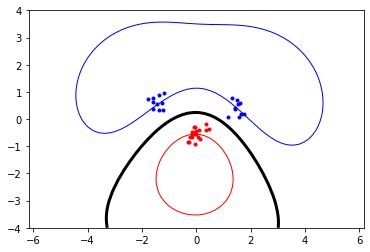

In [14]:
#ML Lab2

import numpy , random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt



class SVM():
	def __init__(self, C = 100, kernel = "linear", kernel_param = 2):
		self.C = C
		self.kernel = kernel
		self.kernel_param = kernel_param

	def getK(self,x,y):
		if self.kernel == "linear":
			return self.__kernel_linear(x, y)
		if self.kernel == "poly":
			return self.__kernel_poly(x, y)
		if self.kernel == "rbf":
			return self.__kernel_rbf(x, y)

	def __kernel_linear(self, x, y):
		return numpy.dot(numpy.transpose(x), y)

	def __kernel_poly(self, x, y):
		return (numpy.dot(numpy.transpose(x), y) + 1) ** self.kernel_param

	def __kernel_rbf(self, x, y):
		return math.exp(-((numpy.linalg.norm(x - y)) ** 2\
			/ (2 * self.kernel_param ** 2)))

	
	def getP(self, targets, x):
		P = numpy.zeros(shape=(N,N))
		for i in range(N):
			for j in range(N):
				P[i][j] = targets[i] * targets[j] * self.getK(x[i], x[j])
		return P

	#takes a vector α⃗ as argument and returns a scalar value
	def objective(self, alpha):
		result = 0.5*numpy.dot(alpha, numpy.dot(numpy.transpose(alpha), self.P)) - numpy.sum(alpha)		
		return result

	def zerofun(self, alpha):
		return numpy.dot(alpha, targets)
	
	def compute_b(self):
		support_vector = self.bigList[0][1]
		t_support = self.bigList[0][2]
		for alpha, x, t in self.bigList:
			if alpha<self.C:
				t_support = t
				support_vector = x


		if t_support == 0:
		    print("ERROR: Couldn't find alpha < C")
		    return 0

		b_result = 0
		for alpha, x, t in self.bigList:
		    b_result += alpha*t*self.getK(support_vector, x)
		return b_result - t_support
		
	def indicator(self, point):
		sum = 0
		for alpha, x, t in self.bigList:
		    sum += alpha*t*self.getK(point, x)
		return sum - self.b

	def plot(self, classA, classB):
	    plt.plot([ p[0] for p in classA], [ p[1] for p in classA], 'b. ' )
	    plt.plot([ p[0] for p in classB], [ p[1] for p in classB], 'r. ' )

	    xgrid = numpy.linspace(-5, 5)
	    ygrid = numpy.linspace(-4, 4)
	    grid = numpy.array([[self.indicator(numpy.array((x,y)))
	                        for x in xgrid]
	                        for y in ygrid])

	    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0),
	                colors = ("red", "black", "blue"),
	                linewidths = (1, 3, 1))

	    plt.axis('equal')           # Force same scale on both axes
	    plt.savefig('svmplot.png')  # Save a copy in a file
	    plt.show()                 # Show the plot on the screen

	def startSVM(self):
			alpha = numpy.zeros(N)
			start = numpy.zeros(N)
			self.P = self.getP(t, x)
			B =[(0, self.C) for b in range(N)]
			XC={'type':'eq', 'fun':self.zerofun}
			ret = minimize(self.objective, start, bounds=B, constraints=XC)
			alpha = ret['x']
			self.bigList = []
			for a in range(len(alpha)):
				if (alpha[a] > 1e-5):
					smallList = [alpha[a], x[a], t[a]]
					self.bigList.append(smallList)
			self.b = self.compute_b()
			self.plot(classA, classB)
			

            

### generate DATA
classA = numpy. concatenate (
	(numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5], numpy.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))

classB = numpy.random.randn(20, 2) * 0.2 + [0.0 , -0.5]

inputs = numpy.concatenate ((classA,classB))
targets = numpy.concatenate ((numpy.ones(classA.shape[0]),-numpy.ones(classB.shape[0])))
N = inputs.shape[0] # Number of rows (samples)
permute=list(range(N))
random.shuffle(permute) 
x = inputs[permute, :]
t = targets[permute]



##start SVM
# svm = SVM(C = 1, kernel = "linear", kernel_param = 0)
svm = SVM(C = 1, kernel = "rbf", kernel_param = 2)
#svm = SVM(C = 10, kernel = "rbf", kernel_param = 3)
svm.startSVM()
